In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [47]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [50]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
7


## Visualise data

In [51]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [52]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [53]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


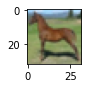

In [54]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

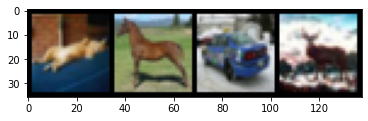

cat horse car deer


In [56]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [0]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [0]:
net = FirstCNN()

In [59]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [60]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [61]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


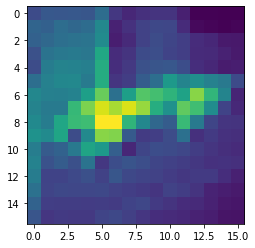

In [62]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [0]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [64]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

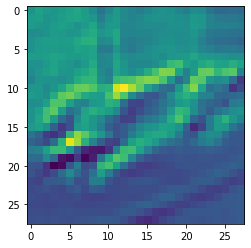

In [65]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [0]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [67]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

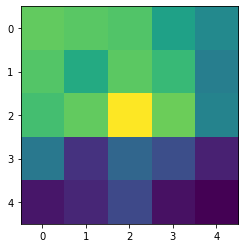

In [68]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [70]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [71]:
print(out)

tensor([[ 0.0067, -0.0007,  0.0266,  0.0078,  0.0322,  0.0659,  0.1254,  0.0042,
          0.0773, -0.0267],
        [ 0.0107, -0.0096,  0.0335,  0.0230,  0.0420,  0.0858,  0.1284,  0.0127,
          0.0787, -0.0254],
        [ 0.0147, -0.0053,  0.0297,  0.0185,  0.0455,  0.0889,  0.1308,  0.0210,
          0.0827, -0.0340],
        [ 0.0160,  0.0080,  0.0285,  0.0066,  0.0490,  0.0893,  0.1326,  0.0297,
          0.0865, -0.0427]], grad_fn=<AddmmBackward>)


In [72]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([6, 6, 6, 6])


## Training LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [74]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/64, Test acc: 37.38, Train acc: 37.61
Epoch: 1/64, Test acc: 42.67, Train acc: 42.87
Epoch: 2/64, Test acc: 45.31, Train acc: 46.29
Epoch: 3/64, Test acc: 47.97, Train acc: 49.34
Epoch: 4/64, Test acc: 49.62, Train acc: 51.10
Epoch: 5/64, Test acc: 51.25, Train acc: 53.72
Epoch: 6/64, Test acc: 52.22, Train acc: 55.36
Epoch: 7/64, Test acc: 52.20, Train acc: 56.47
Epoch: 8/64, Test acc: 53.82, Train acc: 58.32
Epoch: 9/64, Test acc: 54.26, Train acc: 59.49
Epoch: 10/64, Test acc: 55.76, Train acc: 61.14
Epoch: 11/64, Test acc: 55.25, Train acc: 61.96
Epoch: 12/64, Test acc: 55.35, Train acc: 62.37
Epoch: 13/64, Test acc: 55.29, Train acc: 63.64
Epoch: 14/64, Test acc: 55.26, Train acc: 64.20
Epoch: 15/64, Test acc: 56.42, Train acc: 64.95
Epoch: 16/64, Test acc: 55.85, Train acc: 65.90
Epoch: 17/64, Test acc: 56.10, Train acc: 66.20
Epoch: 18/64, Test acc: 55.61, Train acc: 66.46
Epoch: 19/64, Test acc: 56.06, Train acc: 67.89
Epoch: 20/64, Test acc: 56.23, Train acc: 68.66
Ep

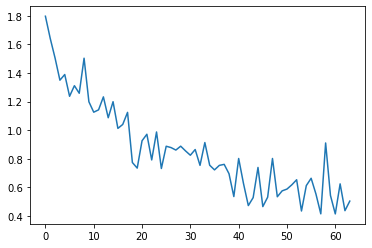

CPU times: user 25min 6s, sys: 22.1 s, total: 25min 28s
Wall time: 25min 32s


In [78]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 64

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [90]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [93]:
%%time
max_epochs = 100

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/100
Epoch: 1/100
Epoch: 2/100
Epoch: 3/100
Epoch: 4/100
Epoch: 5/100
Epoch: 6/100
Epoch: 7/100
Epoch: 8/100
Epoch: 9/100
Epoch: 10/100
Epoch: 11/100
Epoch: 12/100
Epoch: 13/100
Epoch: 14/100
Epoch: 15/100
Epoch: 16/100
Epoch: 17/100
Epoch: 18/100
Epoch: 19/100
Epoch: 20/100
Epoch: 21/100
Epoch: 22/100
Epoch: 23/100
Epoch: 24/100
Epoch: 25/100
Epoch: 26/100
Epoch: 27/100
Epoch: 28/100
Epoch: 29/100
Epoch: 30/100
Epoch: 31/100
Epoch: 32/100
Epoch: 33/100
Epoch: 34/100
Epoch: 35/100
Epoch: 36/100
Epoch: 37/100
Epoch: 38/100
Epoch: 39/100
Epoch: 40/100
Epoch: 41/100
Epoch: 42/100
Epoch: 43/100
Epoch: 44/100
Epoch: 45/100
Epoch: 46/100
Epoch: 47/100
Epoch: 48/100
Epoch: 49/100
Epoch: 50/100
Epoch: 51/100
Epoch: 52/100
Epoch: 53/100
Epoch: 54/100
Epoch: 55/100
Epoch: 56/100
Epoch: 57/100
Epoch: 58/100
Epoch: 59/100
Epoch: 60/100
Epoch: 61/100
Epoch: 62/100
Epoch: 63/100
Epoch: 64/100
Epoch: 65/100
Epoch: 66/100
Epoch: 67/100
Epoch: 68/100
Epoch: 69/100
Epoch: 70/100
Epoch: 71/100
Ep

In [94]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 50.13, Train acc: 94.00


## Basic Visualisation

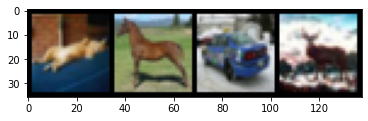

In [95]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [97]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [98]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

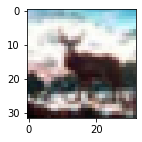

In [99]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


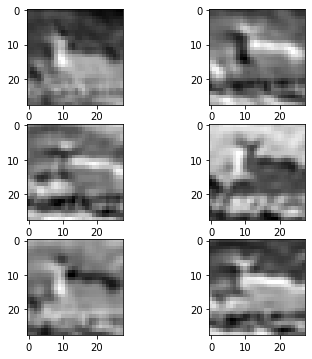

In [100]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()